In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%config InlineBackend.figure_formats = ['retina']
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
info_patents = pd.read_pickle('../new_info_patents')
info_companies = pd.read_csv('./Data/new_info_companies.csv')

In [3]:
info_companies.drop(columns = [info_companies.columns.values[0]], inplace = True)

In [4]:
stat_columns = ["assignee_id", "assignee_lastknown_country", "assignee_total_num_patents", "assignee_total_num_inventors", "proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]
interest_info_companies = info_companies[stat_columns]

# OLS Regressions

## simplistic linear model without entity fixed effects

In [5]:
reg_companies = interest_info_companies[["assignee_total_num_patents", "assignee_total_num_inventors", "proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
model = sm.OLS(reg_companies.proportion_marked_patents, reg_companies.drop('proportion_marked_patents', axis = 1))
result = model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.110
Model:                                   OLS   Adj. R-squared:                  0.104
Method:                        Least Squares   F-statistic:                       nan
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):                nan
Time:                               08:53:36   Log-Likelihood:                -14.383
No. Observations:                       1695   AIC:                             50.77
Df Residuals:                           1684   BIC:                             110.6
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [20]:
vif = pd.DataFrame()
vif["variables"] = reg_companies.columns
vif["VIF"] = [variance_inflation_factor(reg_companies.values, i) for i in range(reg_companies.shape[1])]
vif

,variables,VIF
0,assignee_total_num_patents,8.318907
1,assignee_total_num_inventors,8.425058
2,proportion_marked_patents,1.123104
3,proportion_multi_ipc,1.126157
4,proportion_A_ipc,1.461959
5,proportion_B_ipc,1.381038
6,proportion_C_ipc,1.500389
7,proportion_D_ipc,1.075185
8,proportion_E_ipc,1.077322
9,proportion_F_ipc,1.192314


## work on non-linearity dependencies

### logarithmic dependencies for total number of patents/inventors

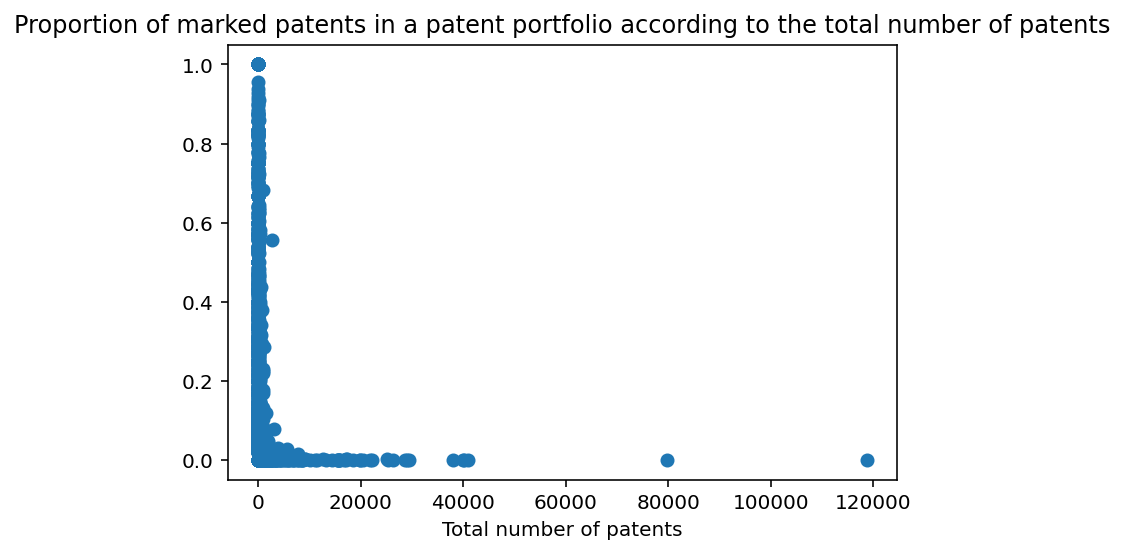

In [10]:
plt.scatter(reg_companies.assignee_total_num_patents, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of patents')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of patents')
plt.show()

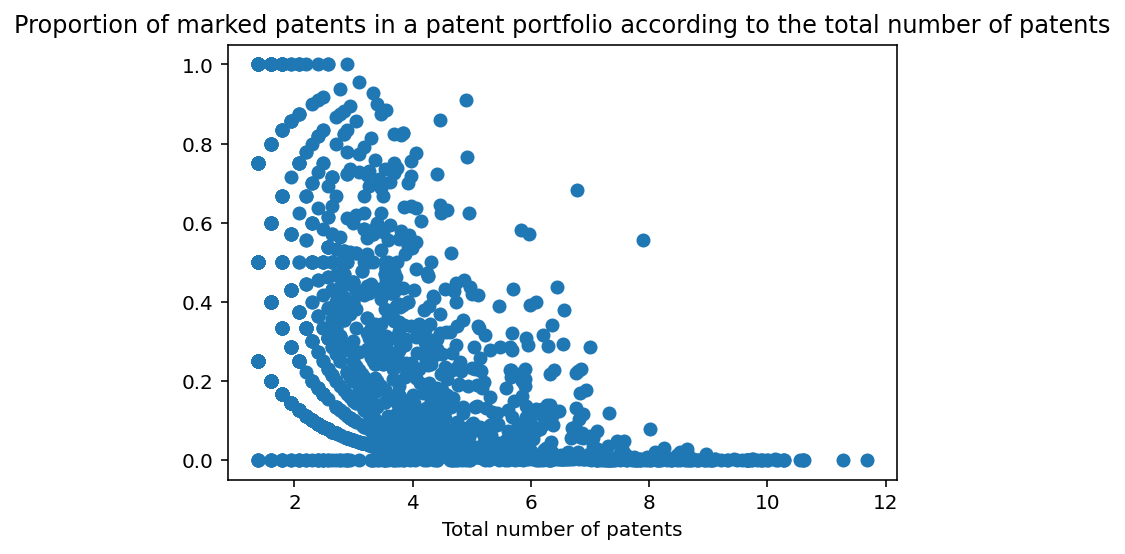

In [11]:
plt.scatter(np.log(reg_companies.assignee_total_num_patents), reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of patents')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of patents')
plt.show()

In [25]:
log_sqrt_companies = reg_companies[["proportion_marked_patents"]]
log_sqrt_companies["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_sqrt_companies["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_sqrt_companies= sm.add_constant(log_sqrt_companies)
log_patents_model = sm.OLS(log_sqrt_companies.proportion_marked_patents, log_sqrt_companies.drop('proportion_marked_patents', axis = 1))
result = log_patents_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.278
Model:                                   OLS   Adj. R-squared:                  0.277
Method:                        Least Squares   F-statistic:                     537.6
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          1.79e-181
Time:                               13:20:26   Log-Likelihood:                 163.35
No. Observations:                       1695   AIC:                            -320.7
Df Residuals:                           1692   BIC:                            -304.4
Df Model:                                  2                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-25-7361081d2e00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_companies["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-25-7361081d2e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_companies["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


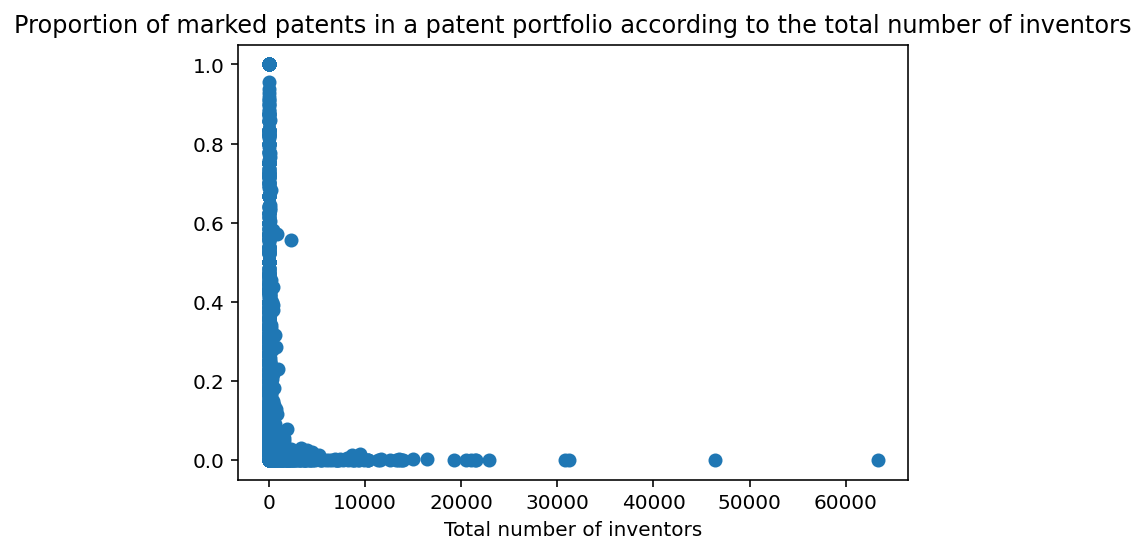

In [27]:
plt.scatter(reg_companies.assignee_total_num_inventors, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of inventors')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of inventors')
plt.show()

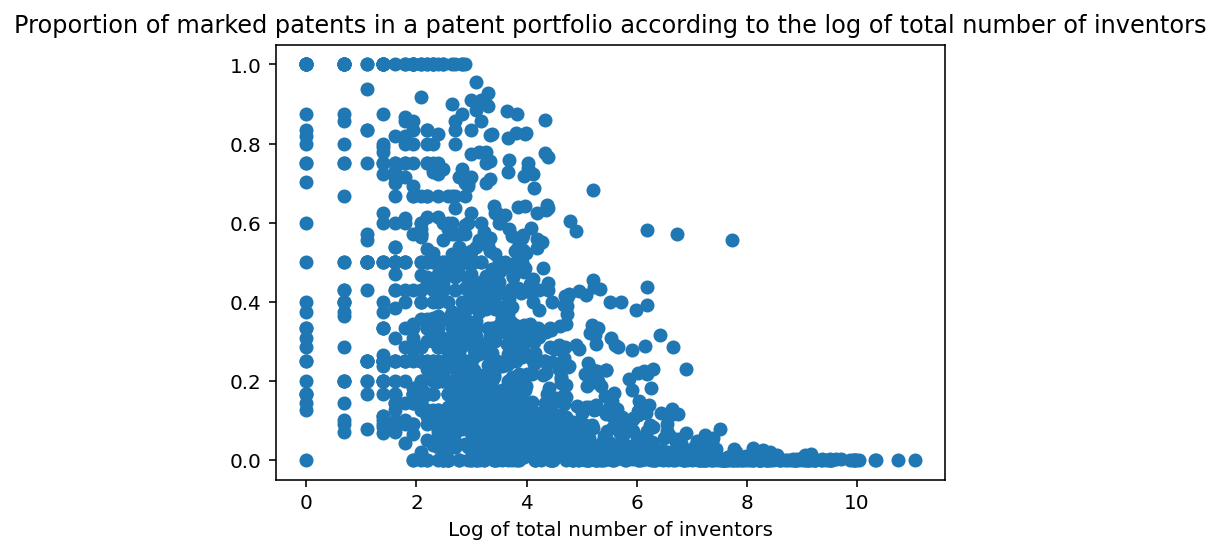

In [32]:
plt.scatter(np.log(reg_companies.assignee_total_num_inventors), reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Log of total number of inventors')
plt.title('Proportion of marked patents in a patent portfolio according to the log of total number of inventors')
plt.show()

In [35]:
log_sqrt_inventors = reg_companies[["proportion_marked_patents"]]
log_sqrt_inventors["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_sqrt_inventors["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))
log_sqrt_inventors= sm.add_constant(log_sqrt_inventors)
log_inventors_model = sm.OLS(log_sqrt_inventors.proportion_marked_patents, log_sqrt_inventors.drop('proportion_marked_patents', axis = 1))
result = log_inventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.315
Model:                                   OLS   Adj. R-squared:                  0.314
Method:                        Least Squares   F-statistic:                     494.7
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          6.75e-170
Time:                               17:03:17   Log-Likelihood:                 208.04
No. Observations:                       1695   AIC:                            -410.1
Df Residuals:                           1692   BIC:                            -393.8
Df Model:                                  2                                         
Covariance Type:                         hc0                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

<ipython-input-35-bc13cf7aa05e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_inventors["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
<ipython-input-35-bc13cf7aa05e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_inventors["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))


In [39]:
log_inventors_patents = reg_companies[["proportion_marked_patents"]]
log_inventors_patents["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_inventors_patents["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_inventors_patents["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_inventors_patents["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))
log_inventors_patents = sm.add_constant(log_inventors_patents)
simple_log_model = sm.OLS(log_inventors_patents.proportion_marked_patents, log_inventors_patents.drop('proportion_marked_patents', axis = 1))
result = simple_log_model.fit(cov_type = 'hc0')
print(result.summary())

<ipython-input-39-35f8eab008f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_inventors_patents["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-39-35f8eab008f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_inventors_patents["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-39-35f8eab008f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.339
Model:                                   OLS   Adj. R-squared:                  0.337
Method:                        Least Squares   F-statistic:                     299.9
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          5.34e-195
Time:                               17:11:40   Log-Likelihood:                 237.80
No. Observations:                       1695   AIC:                            -465.6
Df Residuals:                           1690   BIC:                            -438.4
Df Model:                                  4                                         
Covariance Type:                         hc0                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

sqrt_log_assignee_total_num_inventors is no longer relevant since its p-value is far greater than 0.05.

In [62]:
log_data = reg_companies[["proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_data = sm.add_constant(log_data)
log_model = sm.OLS(log_data.proportion_marked_patents, log_data.drop('proportion_marked_patents', axis = 1))
result = log_model.fit(cov_type = 'hc0')
print(result.summary())
hyp_multi_ipc = 'proportion_multi_ipc = 0'
print(result.f_test(hyp_multi_ipc))

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.366
Model:                                   OLS   Adj. R-squared:                  0.362
Method:                        Least Squares   F-statistic:                     177.4
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          3.61e-288
Time:                               17:55:51   Log-Likelihood:                 274.10
No. Observations:                       1695   AIC:                            -524.2
Df Residuals:                           1683   BIC:                            -459.0
Df Model:                                 11                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-62-44511640a32e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)


In [63]:
log_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_data = sm.add_constant(log_data)
log_model = sm.OLS(log_data.proportion_marked_patents, log_data.drop('proportion_marked_patents', axis = 1))
result = log_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.366
Model:                                   OLS   Adj. R-squared:                  0.363
Method:                        Least Squares   F-statistic:                     192.6
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          2.60e-288
Time:                               18:00:35   Log-Likelihood:                 274.10
No. Observations:                       1695   AIC:                            -526.2
Df Residuals:                           1684   BIC:                            -466.4
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-63-1d5378fe56cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-63-1d5378fe56cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


### zoom on dependencies regarding ipcs

Text(0.5, 1.0, 'Proportion of marked patents according to the proportion of A like patents')

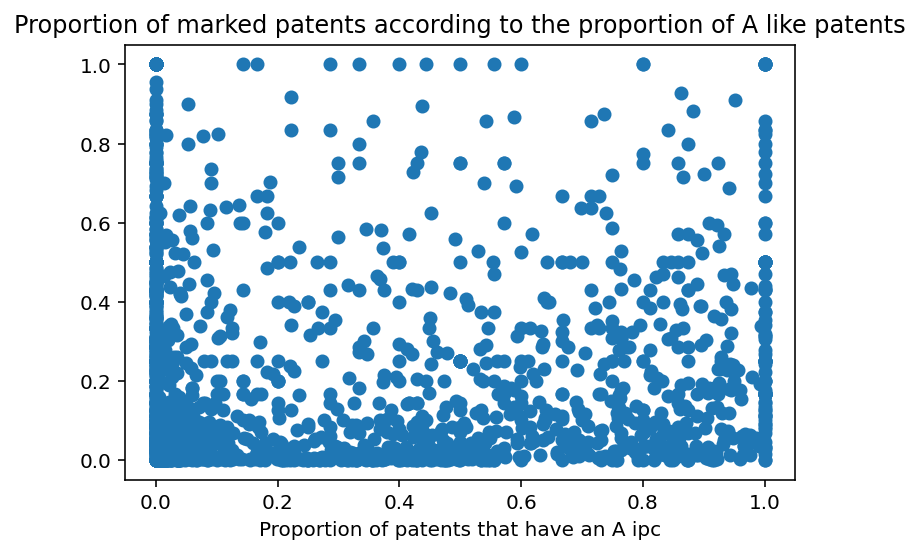

In [52]:
plt.scatter(reg_companies.proportion_A_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an A ipc")
plt.title("Proportion of marked patents according to the proportion of A like patents")
plt.show()

Looks like we might search for a squared-polynomial dependency on A. 

In [85]:
A_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
A_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
A_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
A_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
A_data["squared_proportion_A_ipc"] = (reg_companies.proportion_A_ipc)**2
A_data["cubic_proportion_A_ipc"] = (reg_companies.proportion_A_ipc)**3
A_data = sm.add_constant(A_data)
A_model = sm.OLS(A_data.proportion_marked_patents, A_data.drop('proportion_marked_patents', axis = 1))
result = A_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.367
Model:                                   OLS   Adj. R-squared:                  0.362
Method:                        Least Squares   F-statistic:                     163.1
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          2.47e-286
Time:                               18:20:40   Log-Likelihood:                 274.45
No. Observations:                       1695   AIC:                            -522.9
Df Residuals:                           1682   BIC:                            -452.2
Df Model:                                 12                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-85-528a76b32442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-85-528a76b32442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


In conclusion, no polynomial dependency for A ipc

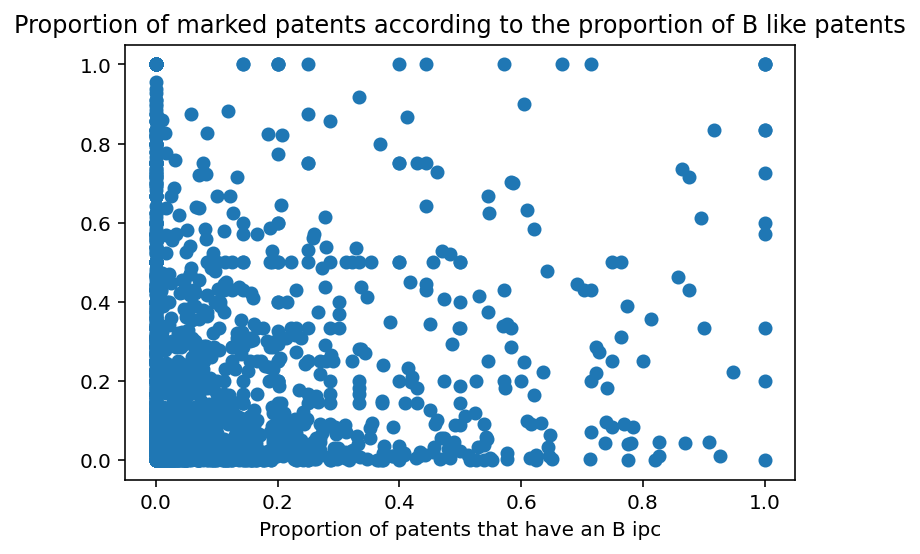

In [53]:
plt.scatter(reg_companies.proportion_B_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an B ipc")
plt.title("Proportion of marked patents according to the proportion of B like patents")
plt.show()

Maybe here too even if the linear part should be more significant than the squared/cubic one. 

In [6]:
B_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
B_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
B_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
B_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
B_data["squared_proportion_B_ipc"] = (reg_companies.proportion_B_ipc)**2
B_data["cubic_proportion_B_ipc"] = (reg_companies.proportion_B_ipc)**3
B_data = sm.add_constant(B_data)
B_model = sm.OLS(B_data.proportion_marked_patents, B_data.drop('proportion_marked_patents', axis = 1))
result = B_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.369
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     163.8
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          2.60e-287
Time:                               09:00:23   Log-Likelihood:                 277.80
No. Observations:                       1695   AIC:                            -529.6
Df Residuals:                           1682   BIC:                            -458.9
Df Model:                                 12                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-6-01c14c08238b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-6-01c14c08238b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


Polynomial dependency on B not significant

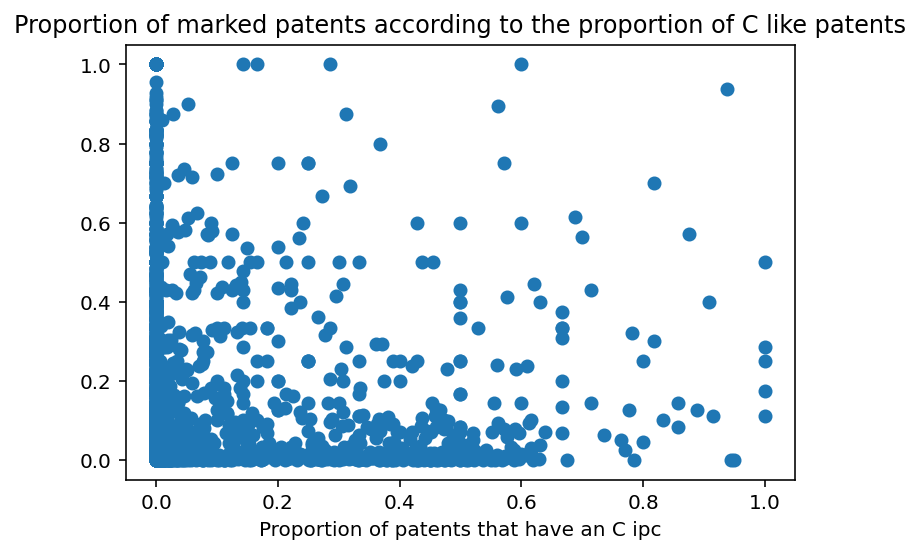

In [54]:
plt.scatter(reg_companies.proportion_C_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an C ipc")
plt.title("Proportion of marked patents according to the proportion of C like patents")
plt.show()

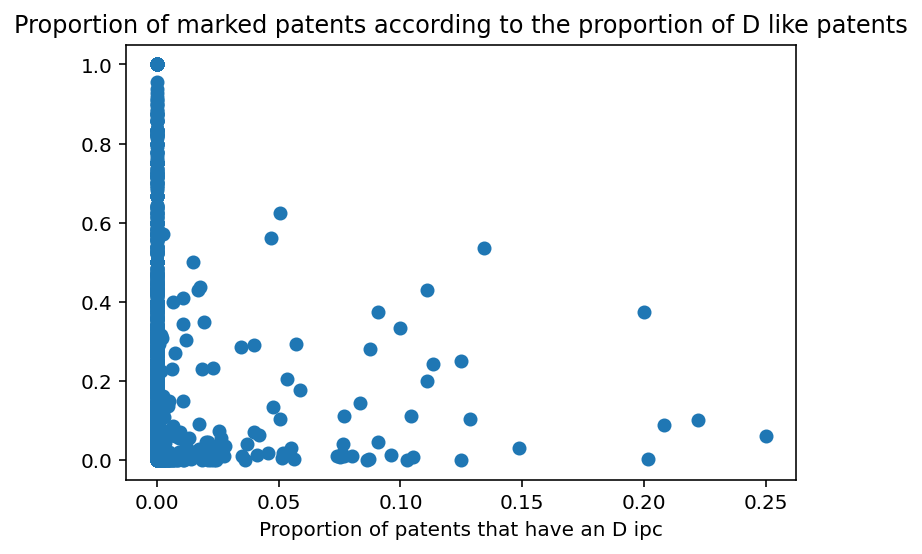

In [55]:
plt.scatter(reg_companies.proportion_D_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an D ipc")
plt.title("Proportion of marked patents according to the proportion of D like patents")
plt.show()

As we might understand from the previous OLS, D does not seem to have a signficant influence over prop_marked_patents. 

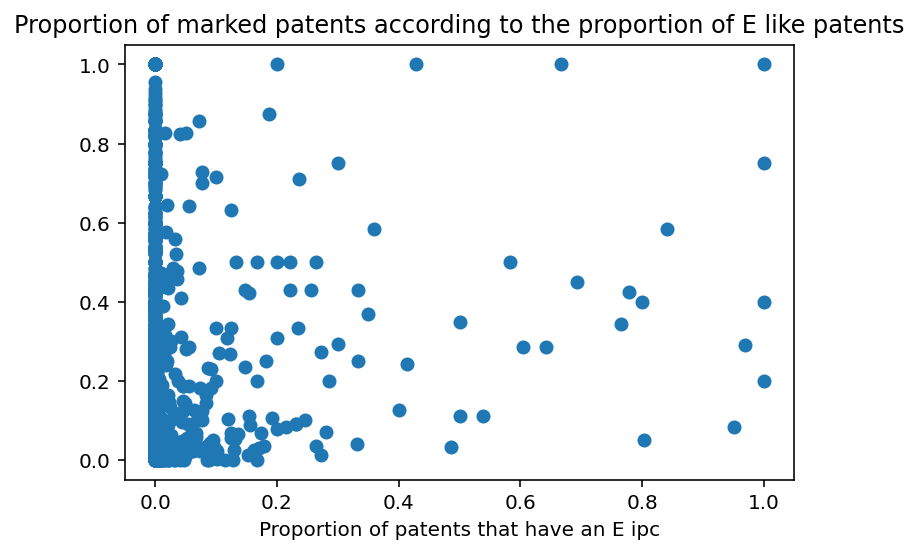

In [56]:
plt.scatter(reg_companies.proportion_E_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an E ipc")
plt.title("Proportion of marked patents according to the proportion of E like patents")
plt.show()

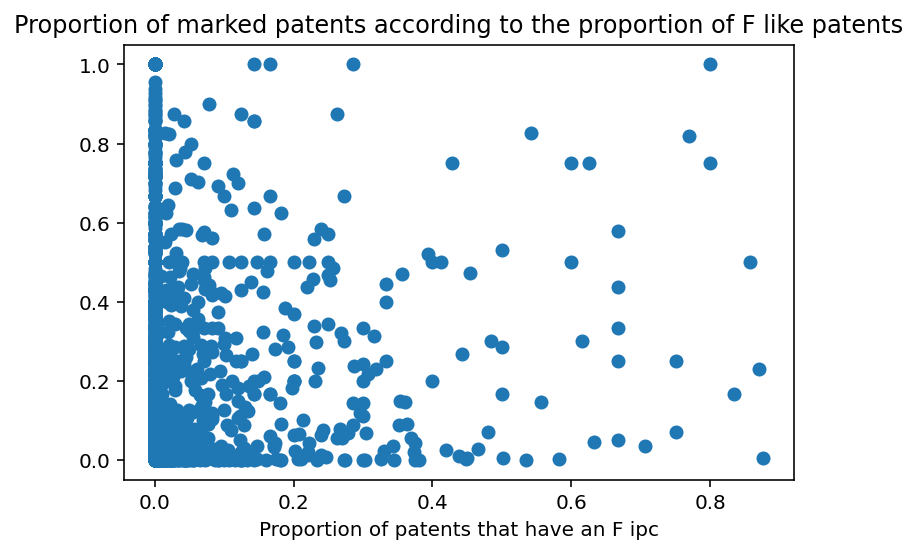

In [57]:
plt.scatter(reg_companies.proportion_F_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an F ipc")
plt.title("Proportion of marked patents according to the proportion of F like patents")
plt.show()

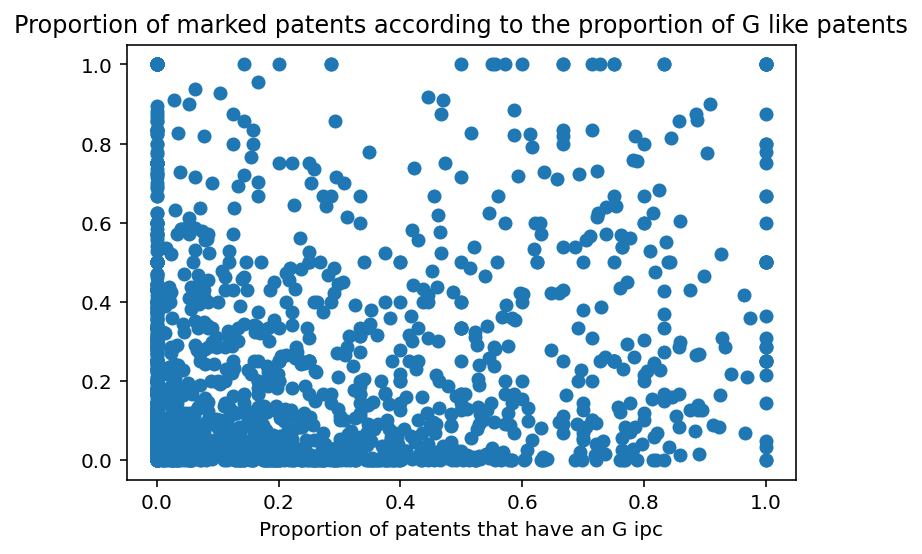

In [58]:
plt.scatter(reg_companies.proportion_G_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an G ipc")
plt.title("Proportion of marked patents according to the proportion of G like patents")
plt.show()

In [12]:
G_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
G_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
G_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
G_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
G_data["squared_proportion_G_ipc"] = (reg_companies.proportion_G_ipc)**2
G_data = sm.add_constant(G_data)
G_model = sm.OLS(G_data.proportion_marked_patents, G_data.drop('proportion_marked_patents', axis = 1))
result = G_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.368
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     176.9
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          1.29e-287
Time:                               09:03:18   Log-Likelihood:                 275.84
No. Observations:                       1695   AIC:                            -527.7
Df Residuals:                           1683   BIC:                            -462.4
Df Model:                                 11                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-12-6ccdac244488>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-12-6ccdac244488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


Same conclusion here

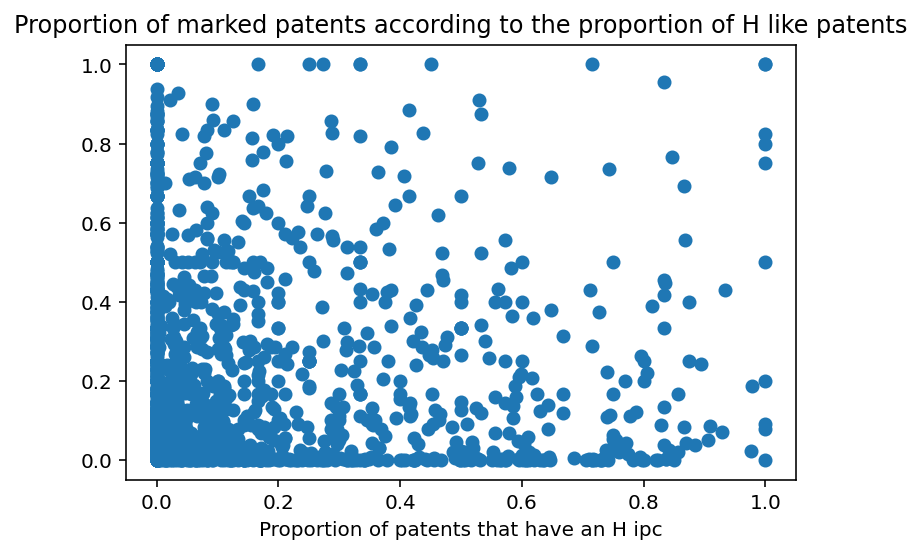

In [59]:
plt.scatter(reg_companies.proportion_H_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an H ipc")
plt.title("Proportion of marked patents according to the proportion of H like patents")
plt.show()

### interaction terms ? 

In [13]:
reg_companies

,assignee_total_num_patents,assignee_total_num_inventors,proportion_marked_patents,proportion_multi_ipc,proportion_A_ipc,proportion_B_ipc,proportion_C_ipc,proportion_D_ipc,proportion_E_ipc,proportion_F_ipc,proportion_G_ipc,proportion_H_ipc
0,570,1098,0.000000,0.415789,0.355107,0.003563,0.513064,0.000000,0.000000,0.000000,0.128266,0.000000
1,1964,1596,0.048880,0.285132,0.093726,0.101472,0.040666,0.001936,0.000387,0.063129,0.423703,0.274981
2,11,64,0.000000,0.272727,0.214286,0.000000,0.785714,0.000000,0.000000,0.000000,0.000000,0.000000
3,1663,2669,0.003608,0.434155,0.212051,0.122441,0.354963,0.005407,0.001159,0.028582,0.199305,0.076091
4,1243,706,0.073210,0.096541,0.730182,0.202182,0.055273,0.000727,0.000000,0.001455,0.006545,0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...
1690,4043,2728,0.000247,0.141232,0.004506,0.020601,0.013948,0.000215,0.000858,0.071888,0.564807,0.323176
1691,5,12,0.200000,0.400000,0.142857,0.571429,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857
1692,4,1,0.750000,0.750000,0.571429,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000
1693,4,16,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [34]:
median = reg_companies.assignee_total_num_inventors.describe()["50%"]
first_quart = reg_companies.assignee_total_num_inventors.describe()["25%"]
last_quart = reg_companies.assignee_total_num_inventors.describe()["75%"]
small_companies = reg_companies[reg_companies.assignee_total_num_inventors <= first_quart]
medium_companies = reg_companies[ (reg_companies.assignee_total_num_inventors <= last_quart) & (reg_companies.assignee_total_num_inventors > first_quart)]
big_companies = reg_companies[reg_companies.assignee_total_num_inventors > last_quart]

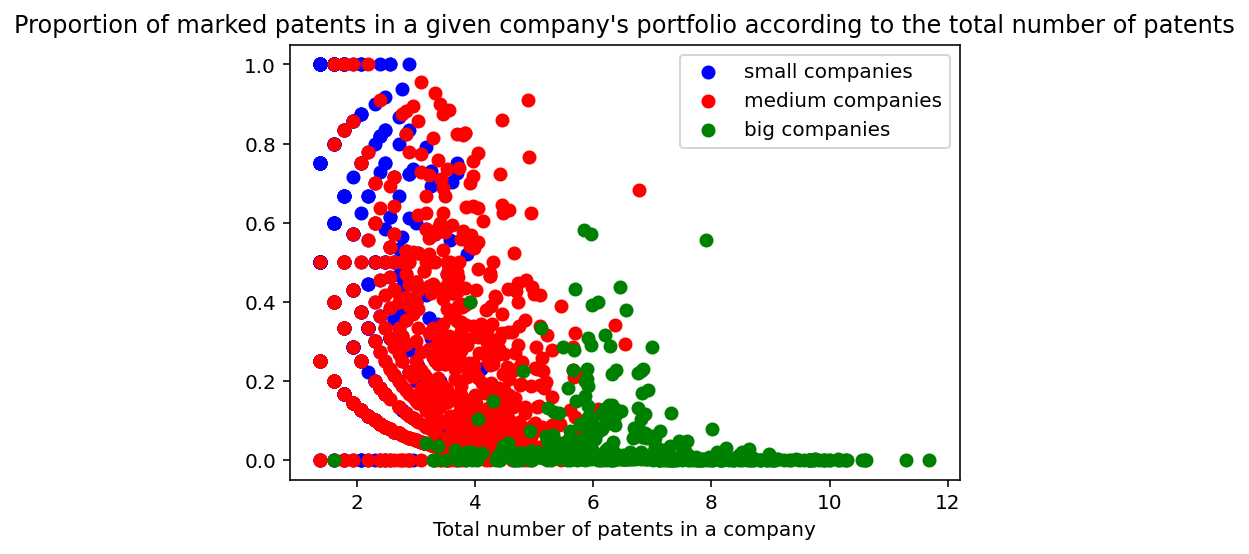

In [36]:
plt.scatter(np.log(small_companies.assignee_total_num_patents), small_companies.proportion_marked_patents, marker = 'o', color = 'b', label = 'small companies')
plt.scatter(np.log(medium_companies.assignee_total_num_patents), medium_companies.proportion_marked_patents, marker = 'o', color = 'r', label = 'medium companies')
plt.scatter(np.log(big_companies.assignee_total_num_patents), big_companies.proportion_marked_patents, marker = 'o', color = 'g', label = 'big companies')
plt.legend()
plt.xlabel("Total number of patents in a company")
plt.title("Proportion of marked patents in a given company's portfolio according to the total number of patents")
plt.show()

The behaviour of the prop of marked patents by total number of patents seems to differ according to the "size" of the company. Moreover, in a logical thinking, one may wonder if a variation in inventors lead to a different influence of patents for marked since the more inventors you have, the more patents you should get. 

In [37]:
patinventors_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
patinventors_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["log(patents)*log(inventors)"] = np.log(reg_companies.assignee_total_num_patents)*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["sqrt(log(patents))*log(inventors)"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data = sm.add_constant(patinventors_data)
patinventors_model = sm.OLS(patinventors_data.proportion_marked_patents, patinventors_data.drop('proportion_marked_patents', axis = 1))
result = patinventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.370
Model:                                   OLS   Adj. R-squared:                  0.366
Method:                        Least Squares   F-statistic:                     164.7
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          2.17e-288
Time:                               09:41:27   Log-Likelihood:                 278.98
No. Observations:                       1695   AIC:                            -532.0
Df Residuals:                           1682   BIC:                            -461.3
Df Model:                                 12                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-37-74e7f01f3734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-37-74e7f01f3734>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


In [41]:
hyp_1 = ("log(patents)*log(inventors) = 0, log_assignee_total_num_patents = 0")
hyp_2 = ("log(patents)*log(inventors) = 0, log_assignee_total_num_patents = 0, sqrt_log_assignee_total_num_patents = 0")
print('Hyp 1 : ', result.f_test(hyp_1))
print('Hyp 2 : ', result.f_test(hyp_2))

Hyp 1 :  <F test: F=array([[1.43656046]]), p=0.2380356284676158, df_denom=1.68e+03, df_num=2>
Hyp 2 :  <F test: F=array([[14.72486465]]), p=1.8197267828567888e-09, df_denom=1.68e+03, df_num=3>


In [42]:
patinventors_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["sqrt(log(patents))*log(inventors)"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data = sm.add_constant(patinventors_data)
patinventors_model = sm.OLS(patinventors_data.proportion_marked_patents, patinventors_data.drop('proportion_marked_patents', axis = 1))
result = patinventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.369
Model:                                   OLS   Adj. R-squared:                  0.366
Method:                        Least Squares   F-statistic:                     193.4
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          4.10e-289
Time:                               09:52:08   Log-Likelihood:                 277.82
No. Observations:                       1695   AIC:                            -533.6
Df Residuals:                           1684   BIC:                            -473.8
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-42-9715c7ca40c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-42-9715c7ca40c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
